In [1]:
# Librerias a usar durante el proyecto

#Importamos las librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import scipy.cluster.hierarchy as sch
import seaborn as sns
import pandas_profiling

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Importing the auxiliar and preprocessing librarys 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import train_test_split, KFold, cross_validate

#Models
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import RidgeClassifier, SGDClassifier, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier, VotingClassifier, RandomTreesEmbedding
from sklearn import metrics #accuracy measure
from sklearn.metrics import confusion_matrix #for confusion matrix

import xgboost as xg

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from sklearn import svm #support vector Machine
from sklearn.naive_bayes import GaussianNB #Naive bayes

import shap

In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\34654\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mpl

In [2]:
df_stata = pd.read_csv("C:/Users/34654/Desktop/Big_Data/Master/TFM/EPA_muestraCompleta_VFstata.csv",sep=',')

In [3]:
df_stata

,ciclo,ccaa,prov,nvivi,nivel,npers,edad5,relpp1,sexo1,ncony,...,cata,valen,extre,gal,mad,mur,nav,vasc,rio,ceumel
0,151,16,1,1,1,1,35,1,1,2,...,0,0,0,0,0,0,0,1,0,0
1,151,16,1,1,1,2,35,2,6,1,...,0,0,0,0,0,0,0,1,0,0
2,151,16,1,2,1,1,30,1,1,2,...,0,0,0,0,0,0,0,1,0,0
3,151,16,1,2,1,2,30,2,6,1,...,0,0,0,0,0,0,0,1,0,0
4,151,16,1,3,1,1,25,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1534417,191,52,52,59634,1,4,20,3,6,0,...,0,0,0,0,0,0,0,0,0,1
1534418,191,52,52,59634,1,5,25,4,6,2,...,0,0,0,0,0,0,0,0,0,1
1534419,191,52,52,59635,1,1,45,1,6,2,...,0,0,0,0,0,0,0,0,0,1
1534420,191,52,52,59635,1,2,45,2,1,1,...,0,0,0,0,0,0,0,0,0,1


In [4]:
df_stata.dtypes

ciclo     int64
ccaa      int64
prov      int64
nvivi     int64
nivel     int64
          ...  
mur       int64
nav       int64
vasc      int64
rio       int64
ceumel    int64
Length: 146, dtype: object

In [5]:
print(df_stata.columns.tolist())

['ciclo', 'ccaa', 'prov', 'nvivi', 'nivel', 'npers', 'edad5', 'relpp1', 'sexo1', 'ncony', 'npadre', 'nmadre', 'rellmili', 'eciv1', 'prona1', 'regna1', 'nac1', 'exregna1', 'anore1', 'nforma', 'rellb1', 'edadest', 'cursr', 'ncursr', 'cursnr', 'ncurnr', 'hcurnr', 'rellb2', 'trarem', 'ayudfa', 'ausent', 'rznotb', 'vincul', 'nuevem', 'ocup1', 'act11', 'situ', 'sp', 'ducon1', 'ducon2', 'ducon3', 'tcontm', 'tcontd', 'dren', 'dcom', 'proest', 'regest', 'parco1', 'parco2', 'horasp1', 'horasp2', 'horash1', 'horash2', 'horase1', 'horase2', 'extra', 'extpag1', 'extpag2', 'extnpg1', 'extnpg2', 'rzdifh', 'traplu', 'ocuplu1', 'actplu1', 'sitplu', 'horplu', 'mashor', 'dismas', 'rzndish', 'hordes', 'busotr', 'busca', 'desea', 'fobact', 'nbusca', 'asala', 'embus', 'itbu', 'disp', 'rzndis', 'empant', 'dtant', 'ocupa', 'acta', 'situa', 'ofemp', 'sidi1', 'sidi2', 'sidi3', 'sidac1', 'sidac2', 'mun1', 'prore1', 'repaire1', 'traant', 'aoi', 'cse', 'factorel', 'empleado', 'parado', 'participa', 'inactivo', 'to

#### Feature Engeneering

Variable Target:
- 0: Aquellos que no han trabajado aún.
- 1: Activos y empleados.
- 2: Desempleados.
- 3: Inactivos.

In [6]:
df_stata['aoi'] = pd.to_numeric(df_stata['aoi'], errors='coerce')
df_stata['aoi'] = df_stata['aoi'].fillna(0)
df_stata['estadoIndividuo'] = pd.cut(df_stata['aoi'], [0, 1, 5, 6, 9], labels = [0, 1, 2, 3])
df_stata['estadoIndividuo'] = df_stata['estadoIndividuo'].fillna(0)
df_stata.groupby(['estadoIndividuo'])['estadoIndividuo'].count()

estadoIndividuo
0         0
1    687756
2    148826
3    697840
Name: estadoIndividuo, dtype: int64

#### Modelo XGboost - VF

In [9]:
train_base = ['hombres', 'mujeres', 'genero', 'edad', 'noEstudios', 'educPrim', 'educSec', 
              'educTer', 'cualificacionAlta', 'cualificacionMedia', 'cualificacionBaja', 
              'contratoIndefinido', 'contratoTemporal', 'larga_duracion', 'desempleado_3meses',
              'desempleo_1año', 
              'desempleoMenos1año', 'agricultura', 'industa', 'construccion', 'servicios', 'inmigrante', 
              'nativo', 'doblenacionalidad', 'solo_inscrito', 'ccaa', 'fobact', 'busca', 'participa', 'inactivo']

In [98]:
train,test=train_test_split(df_stata,test_size=0.3,random_state=37)

train_X=train[train_base]
train_Y=train['estadoIndividuo']

test_X=test[train_base]
test_Y=test['estadoIndividuo']

X=df_stata[train_base]
Y=df_stata['estadoIndividuo']

In [99]:
train_X_onehot = pd.get_dummies(train_X)
test_X_onehot = pd.get_dummies(test_X)

In [12]:
model_xg=xg.XGBClassifier(n_estimators=350,learning_rate=0.01)
model_xg.fit(train_X_onehot,train_Y)

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[17:09:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [13]:
train['score_xg'] = model_xg.predict_proba(train_X_onehot)[:,1]
test['score_xg'] = model_xg.predict_proba(test_X_onehot)[:,1]


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


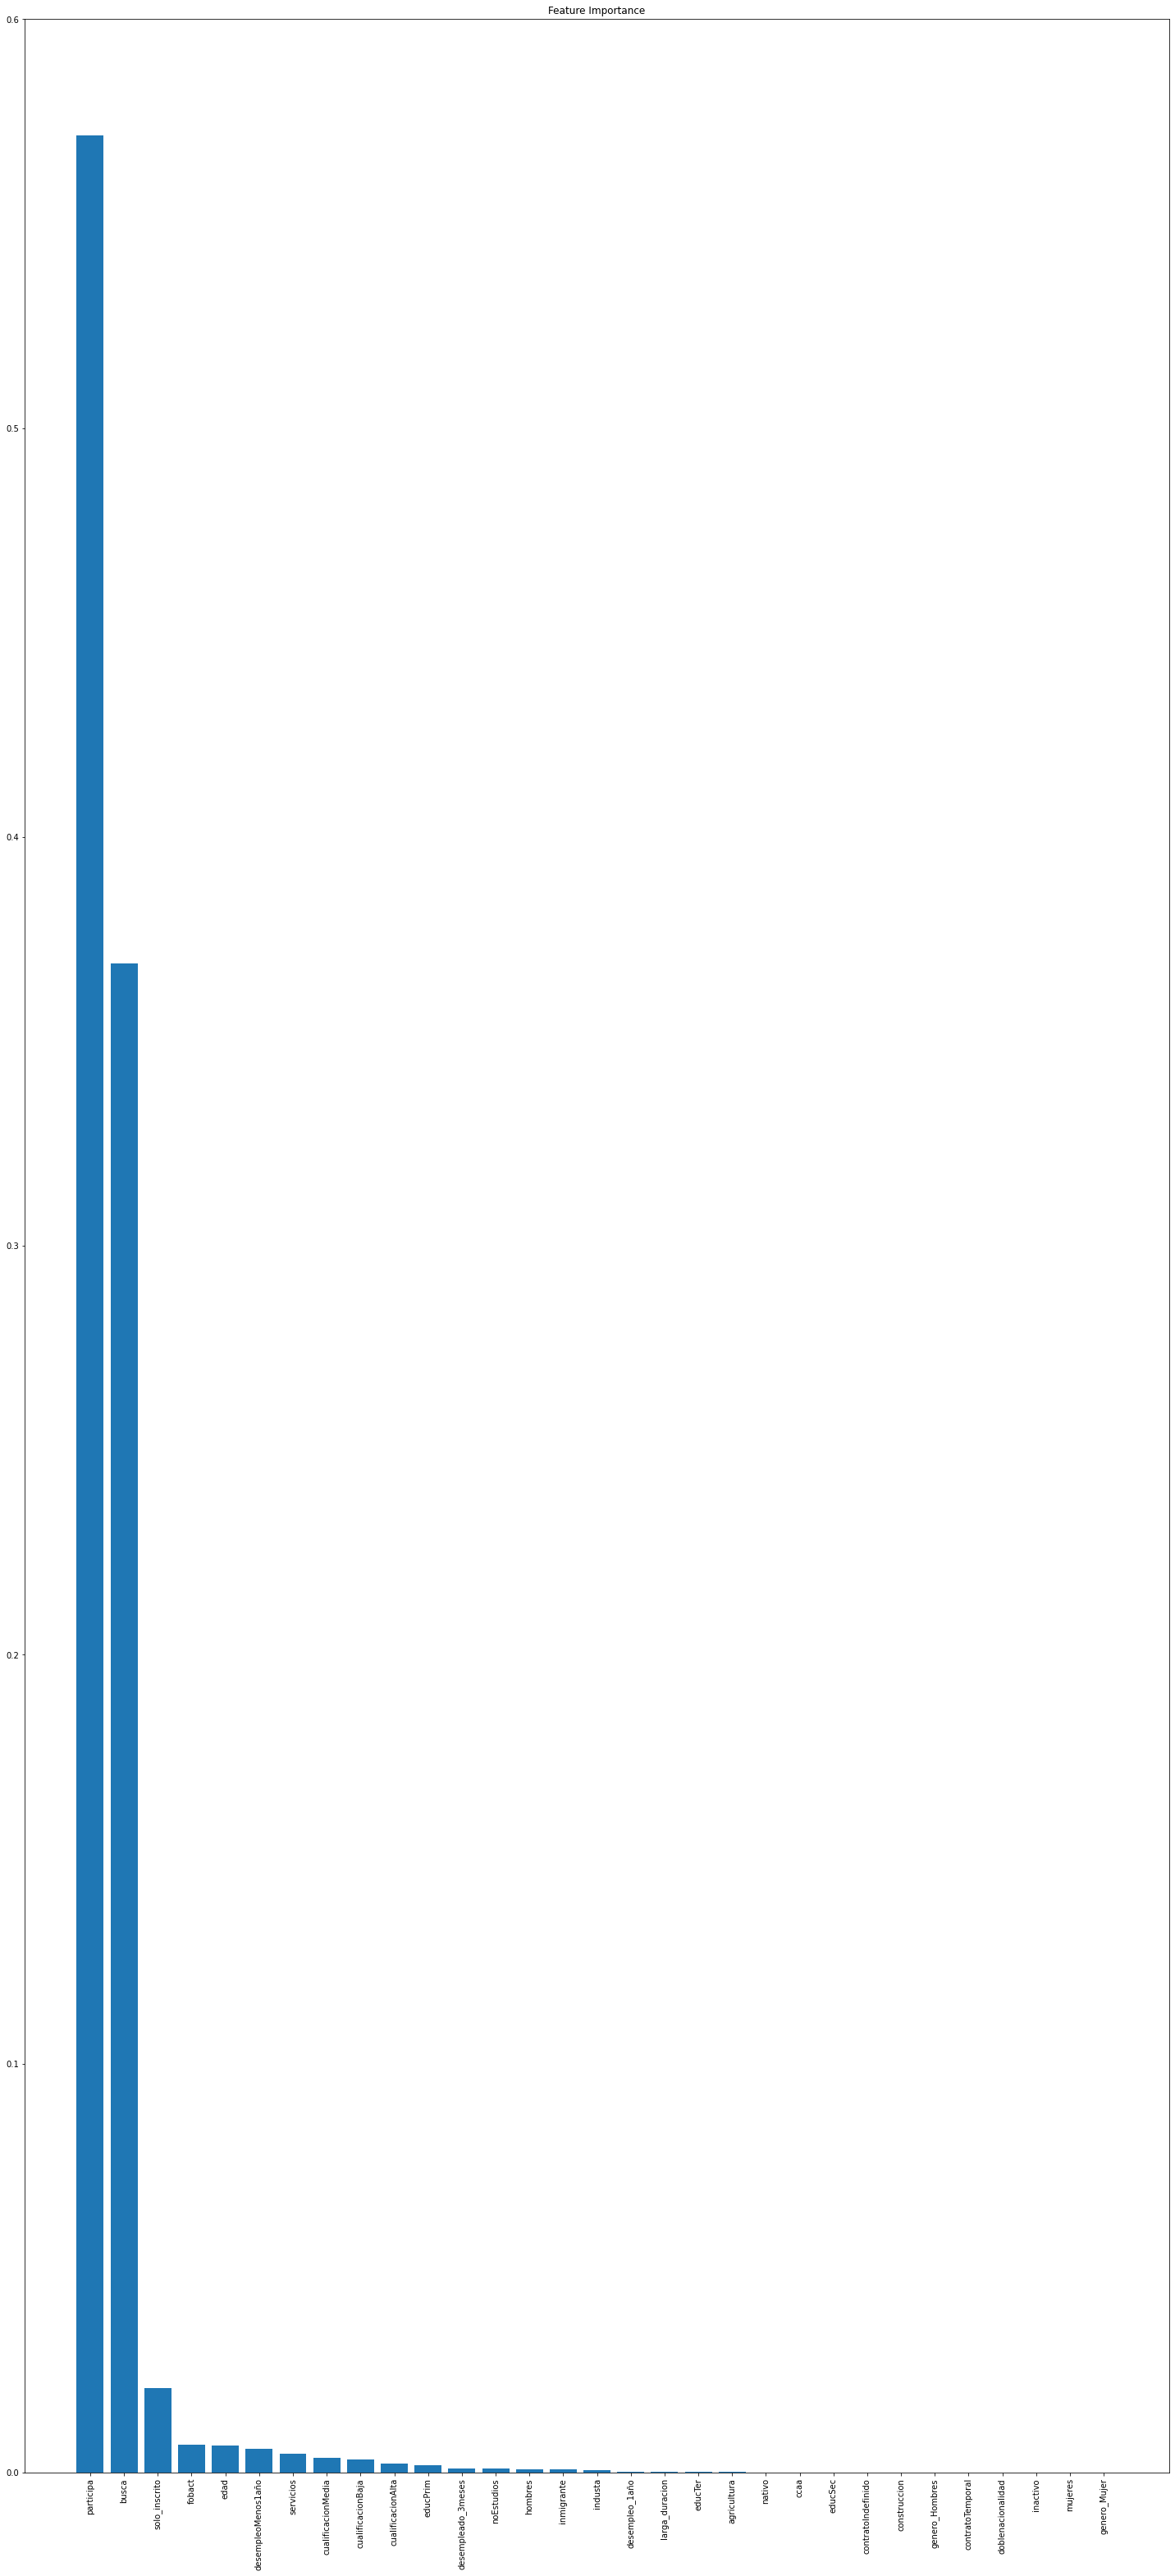

In [16]:
importances = model_xg.feature_importances_

indices = np.argsort(importances)[::-1]

names = [train_X_onehot.columns[i] for i in indices]

plt.figure()
plt.rcParams['figure.figsize'] = [25, 10]
plt.title("Feature Importance")
plt.bar(range(train_X_onehot.shape[1]), importances[indices])
plt.xticks(range(train_X_onehot.shape[1]), names, rotation=90)
plt.show()

In [17]:
train['clasificacion_model_rf'] = model_xg.predict(train_X_onehot) 

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
pd.crosstab(train.clasificacion_model_rf,train.estadoIndividuo).style.background_gradient(cmap='summer_r')

estadoIndividuo,1,2,3
clasificacion_model_rf,,,
1,475740,2033,0
2,5686,102109,0
3,0,0,488527


El tercer valor de la variable target corresponde a los que son inactivos en la busqueda de empleo.

Como hemos incluido la variable "participa" en el modelo, el modelo predice a la perfección quien es inactivo.

Vamos a hacer dos modelos tal como en la version anterior del código, un modelo para empleado y otro para parado ya que
las variables que ayudan a saber la situación de cada uno es diferente.

### Modelo XGboost final: Empleado

In [25]:
train_base_empleado = ['hombres', 'mujeres', 'genero', 'edad', 'noEstudios', 'educPrim', 'educSec', 
              'educTer', 'cualificacionAlta', 'cualificacionMedia', 'cualificacionBaja', 
              'contratoIndefinido', 'contratoTemporal', 'larga_duracion', 'desempleado_3meses',
              'desempleo_1año', 
              'desempleoMenos1año', 'agricultura', 'industa', 'construccion', 'servicios', 'inmigrante', 
              'nativo', 'doblenacionalidad', 'solo_inscrito', 'ccaa']

In [26]:
#train,test=train_test_split(df_stata,test_size=0.3,random_state=37)

train_X=train[train_base_empleado]
train_Y=train['empleado']

test_X=test[train_base_empleado]
test_Y=test['empleado']

X=df_stata[train_base_empleado]
Y=df_stata['empleado']

In [27]:
train_X_onehot = pd.get_dummies(train_X)
test_X_onehot = pd.get_dummies(test_X)

In [28]:
model_xg_empleado=xg.XGBClassifier(n_estimators=350,learning_rate=0.01)
model_xg_empleado.fit(train_X_onehot,train_Y)

[17:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [29]:
train['score_xg_empleado'] = model_xg_empleado.predict_proba(train_X_onehot)[:,1]
test['score_xg_empleado'] = model_xg_empleado.predict_proba(test_X_onehot)[:,1]

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



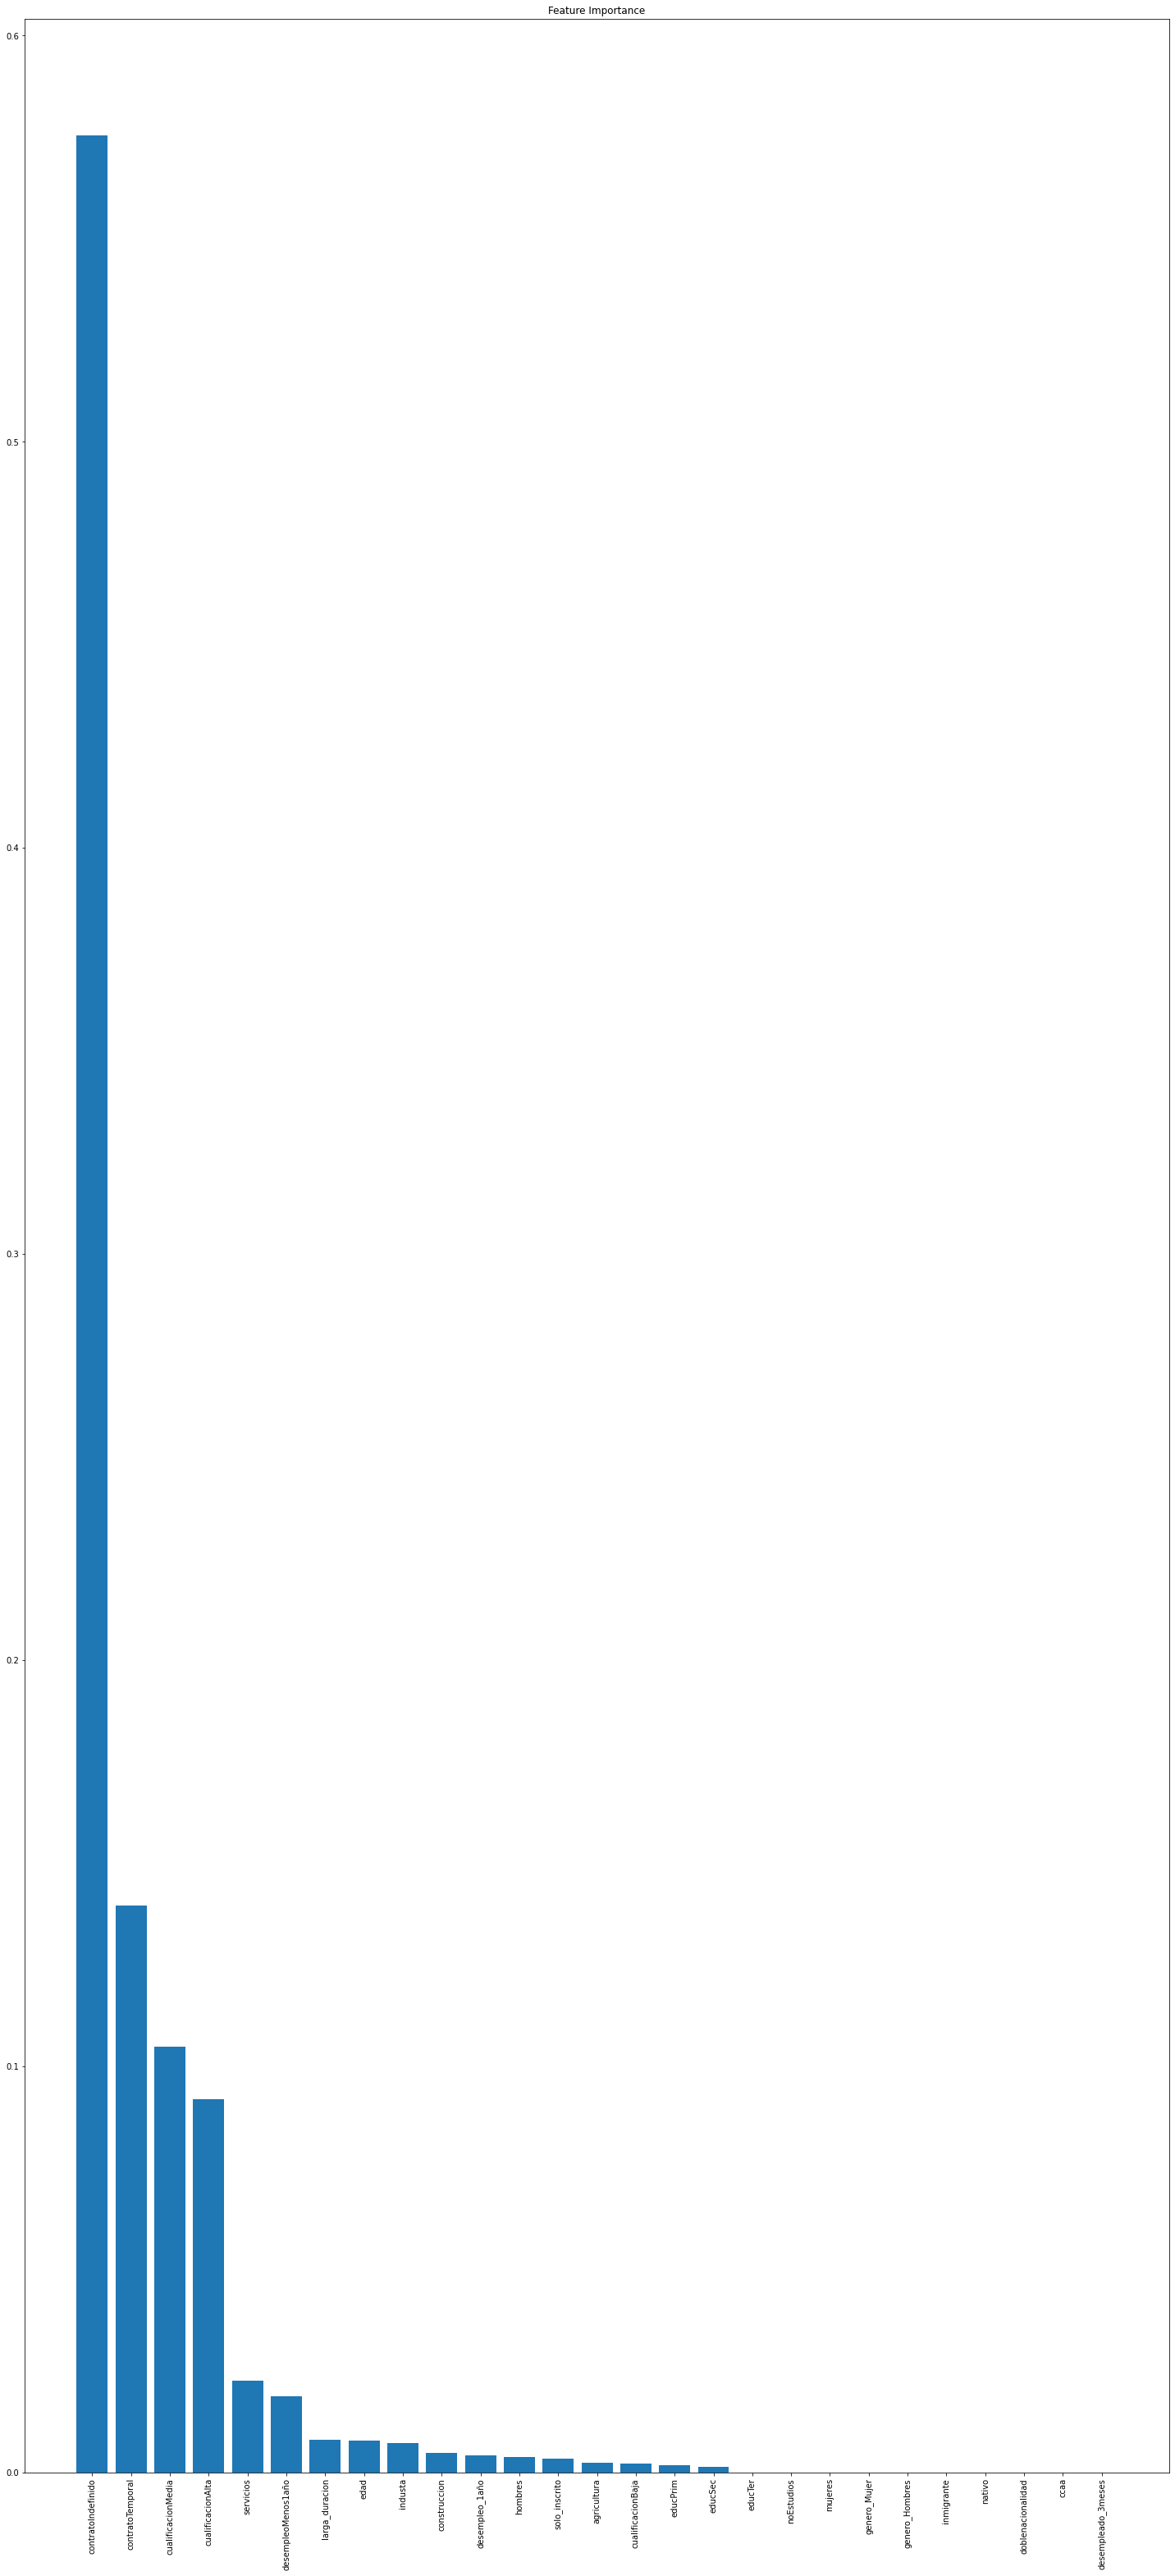

In [30]:
importances = model_xg_empleado.feature_importances_

indices = np.argsort(importances)[::-1]

names = [train_X_onehot.columns[i] for i in indices]

plt.figure()
plt.rcParams['figure.figsize'] = [25, 55]
plt.title("Feature Importance")
plt.bar(range(train_X_onehot.shape[1]), importances[indices])
plt.xticks(range(train_X_onehot.shape[1]), names, rotation=90)
plt.show()

In [32]:
train['clasificacion_model_rf_empleado'] = model_xg_empleado.predict(train_X_onehot) 

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [33]:
pd.crosstab(train.clasificacion_model_rf_empleado,train.empleado).style.background_gradient(cmap='summer_r')

empleado,0,1
clasificacion_model_rf_empleado,,
0,586395,6123
1,17697,463880


In [34]:
metrics.precision_score(train.empleado, train.clasificacion_model_rf_empleado)

0.9632519825490005

In [35]:
metrics.recall_score(train.empleado, train.clasificacion_model_rf_empleado)

0.986972423580275

In [36]:
fpr, tpr, thresholds = metrics.roc_curve(train.empleado, train.clasificacion_model_rf_empleado, pos_label=1)

metrics.auc(fpr, tpr)

0.9788386084449517

### Modelo XGboost final: Empleado 2

In [43]:
train_base_empleado2 = ['hombres', 'mujeres', 'edad', 'noEstudios', 'educPrim', 'educSec', 
              'educTer', 'cualificacionAlta', 'cualificacionMedia', 'cualificacionBaja', 
              'larga_duracion', 'desempleado_3meses',
              'desempleo_1año', 'desempleoMenos1año', 'inmigrante', 
              'nativo', 'doblenacionalidad', 'solo_inscrito', 'ccaa', 'fobact', 'busca', 'participa']

In [44]:
train,test=train_test_split(df_stata,test_size=0.3,random_state=37)

train_X=train[train_base_empleado2]
train_Y=train['empleado']

test_X=test[train_base_empleado2]
test_Y=test['empleado']

X=df_stata[train_base_empleado2]
Y=df_stata['empleado']

In [45]:
train_X_onehot = pd.get_dummies(train_X)
test_X_onehot = pd.get_dummies(test_X)

In [46]:
model_xg_empleado2=xg.XGBClassifier(n_estimators=350,learning_rate=0.01)
model_xg_empleado2.fit(train_X_onehot,train_Y)

[17:50:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [47]:
train['score_xg_empleado2'] = model_xg_empleado2.predict_proba(train_X_onehot)[:,1]
test['score_xg_empleado2'] = model_xg_empleado2.predict_proba(test_X_onehot)[:,1]

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



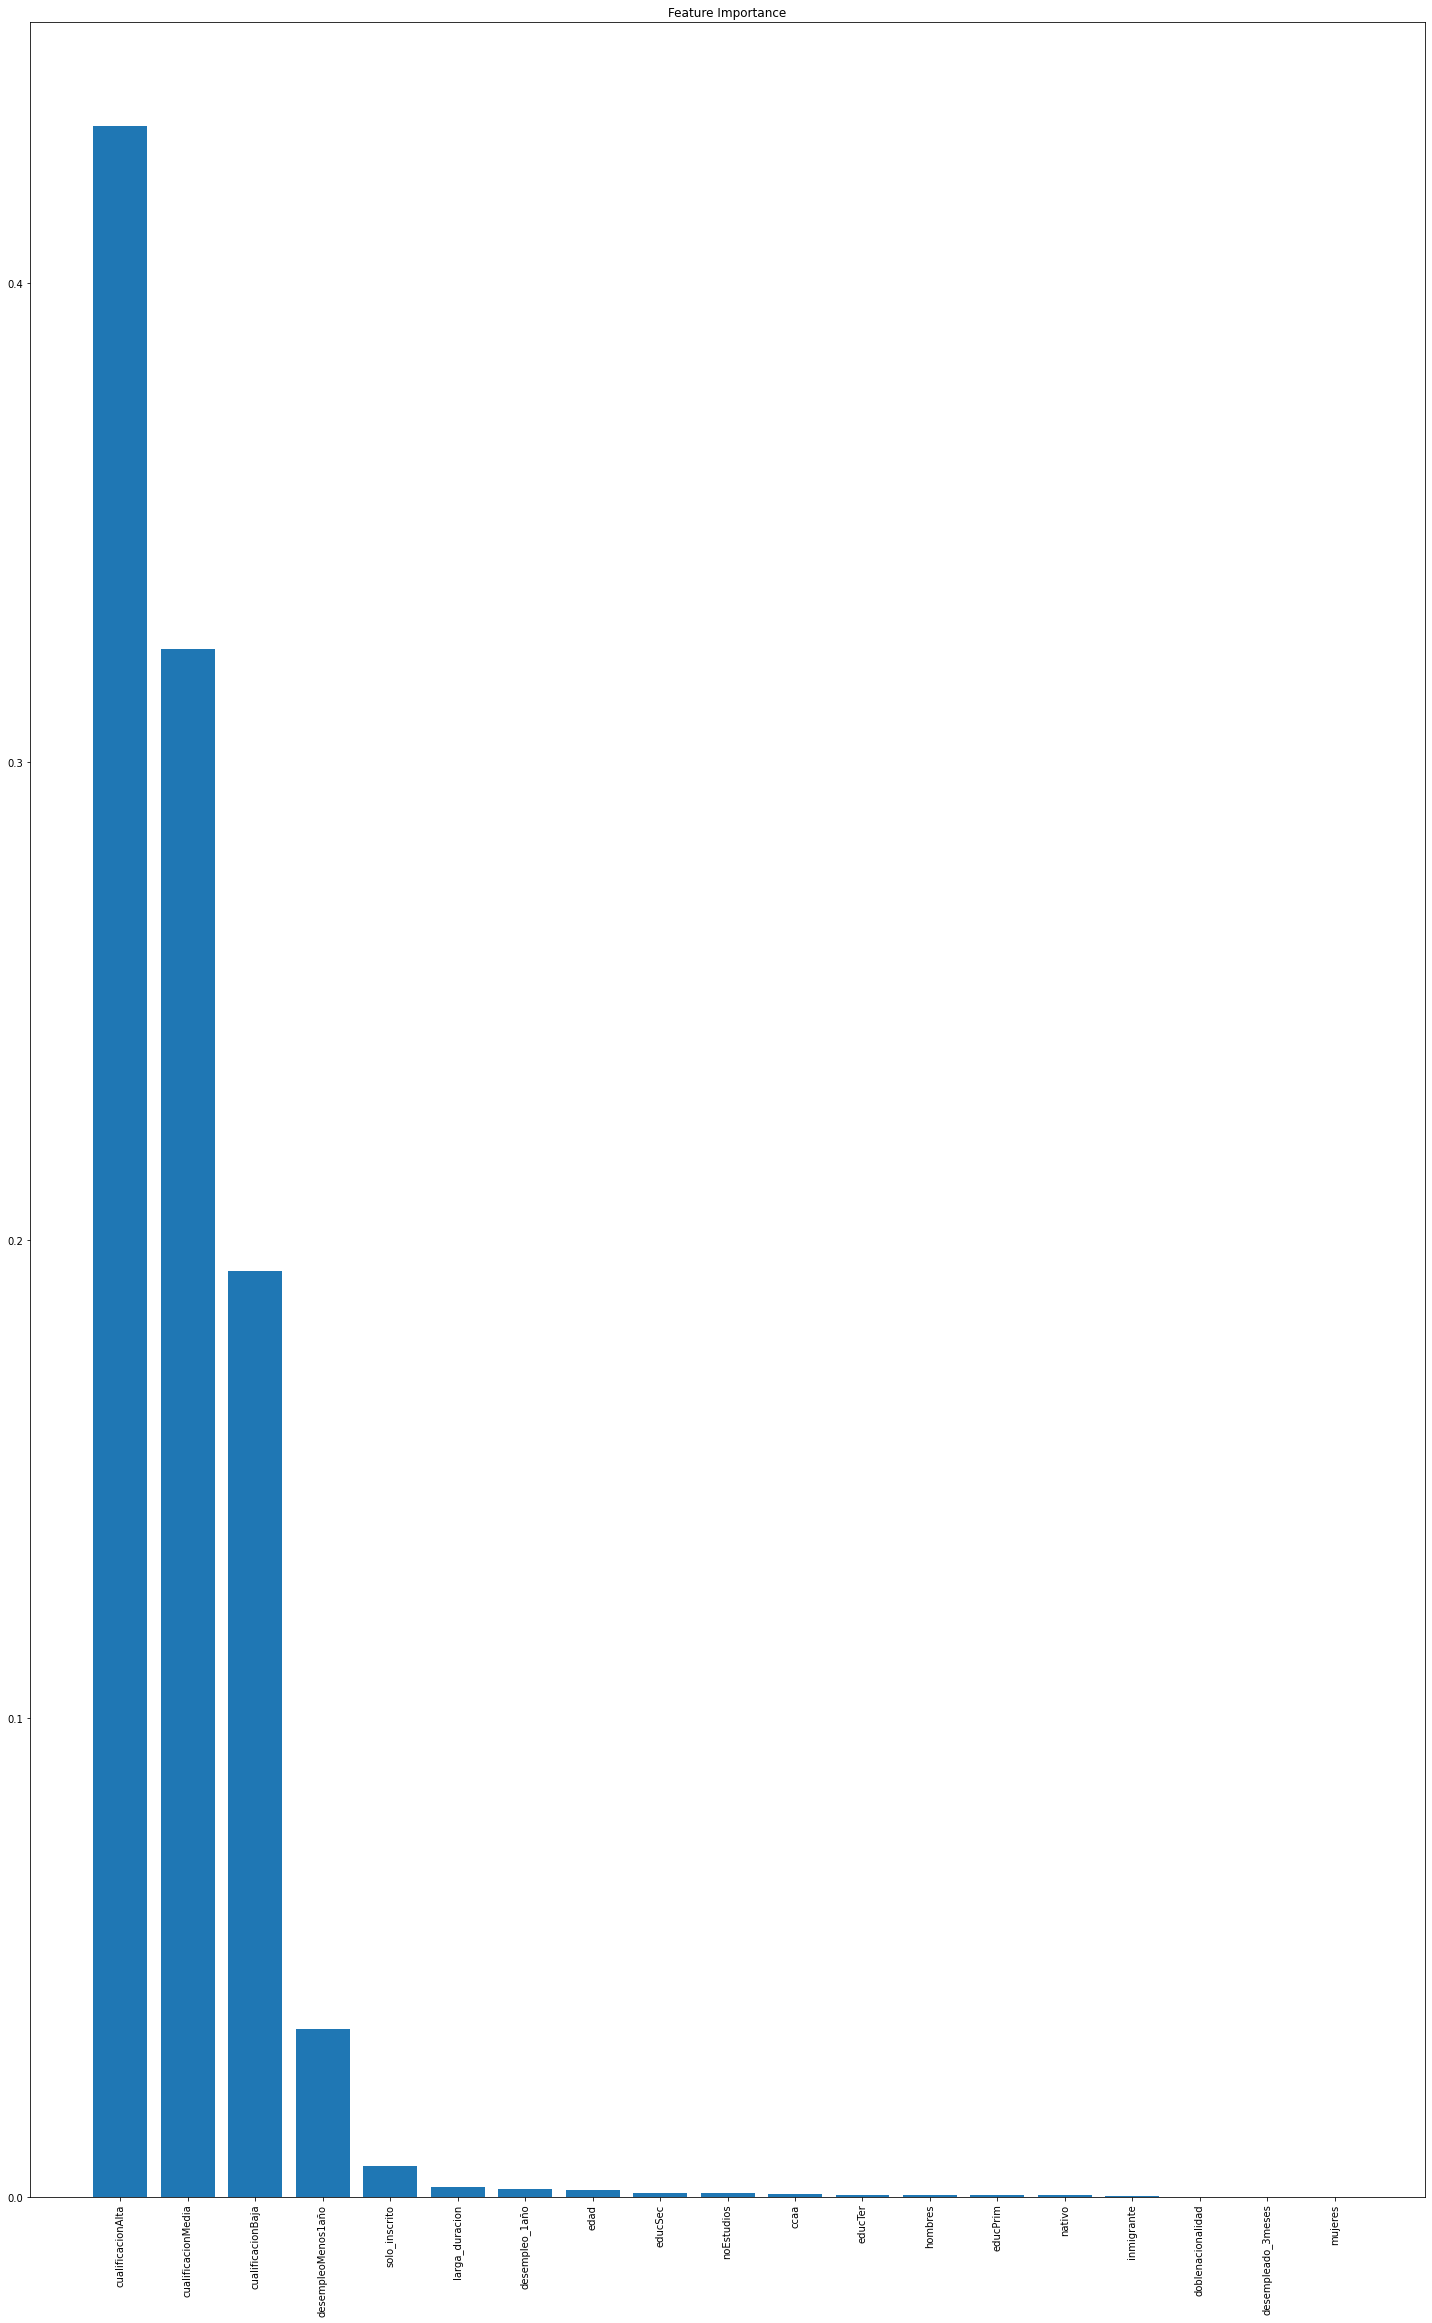

In [48]:
importances = model_xg_empleado2.feature_importances_

indices = np.argsort(importances)[::-1]

names = [train_X_onehot.columns[i] for i in indices]

plt.figure()
plt.rcParams['figure.figsize'] = [25, 40]
plt.title("Feature Importance")
plt.bar(range(train_X_onehot.shape[1]), importances[indices])
plt.xticks(range(train_X_onehot.shape[1]), names, rotation=90)
plt.show()

In [49]:
train['clasificacion_model_rf_empleado2'] = model_xg_empleado2.predict(train_X_onehot) 

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [50]:
pd.crosstab(train.clasificacion_model_rf_empleado2,train.empleado).style.background_gradient(cmap='summer_r')

empleado,0,1
clasificacion_model_rf_empleado2,,
0,564606,11257
1,39486,458746


In [52]:
metrics.precision_score(train.empleado, train.clasificacion_model_rf_empleado2)

0.9207477640938359

In [53]:
metrics.recall_score(train.empleado, train.clasificacion_model_rf_empleado2)

0.9760490890483677

In [54]:
fpr, tpr, thresholds = metrics.roc_curve(train.empleado, train.clasificacion_model_rf_empleado2, pos_label=1)

metrics.auc(fpr, tpr)

0.9553424365009027

### Modelo XGboost final: desempleado

In [65]:
train_base_desempleado = ['hombres', 'mujeres', 'edad', 'noEstudios', 'educPrim', 'educSec', 
              'educTer', 'cualificacionAlta', 'cualificacionMedia', 'cualificacionBaja', 
              'larga_duracion', 'desempleado_3meses',
              'desempleo_1año', 
              'desempleoMenos1año', 'agricultura', 'industa', 'construccion', 'servicios', 'inmigrante', 
              'nativo', 'doblenacionalidad', 'ccaa', 'fobact', 'participa']

In [66]:
train,test=train_test_split(df_stata,test_size=0.3,random_state=37)

train_X=train[train_base_desempleado]
train_Y=train['parado']

test_X=test[train_base_desempleado]
test_Y=test['parado']

X=df_stata[train_base_desempleado]
Y=df_stata['parado']

In [67]:
train_X_onehot = pd.get_dummies(train_X)
test_X_onehot = pd.get_dummies(test_X)

In [68]:
model_xg_parado=xg.XGBClassifier(n_estimators=350,learning_rate=0.01)
model_xg_parado.fit(train_X_onehot,train_Y)

[18:07:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

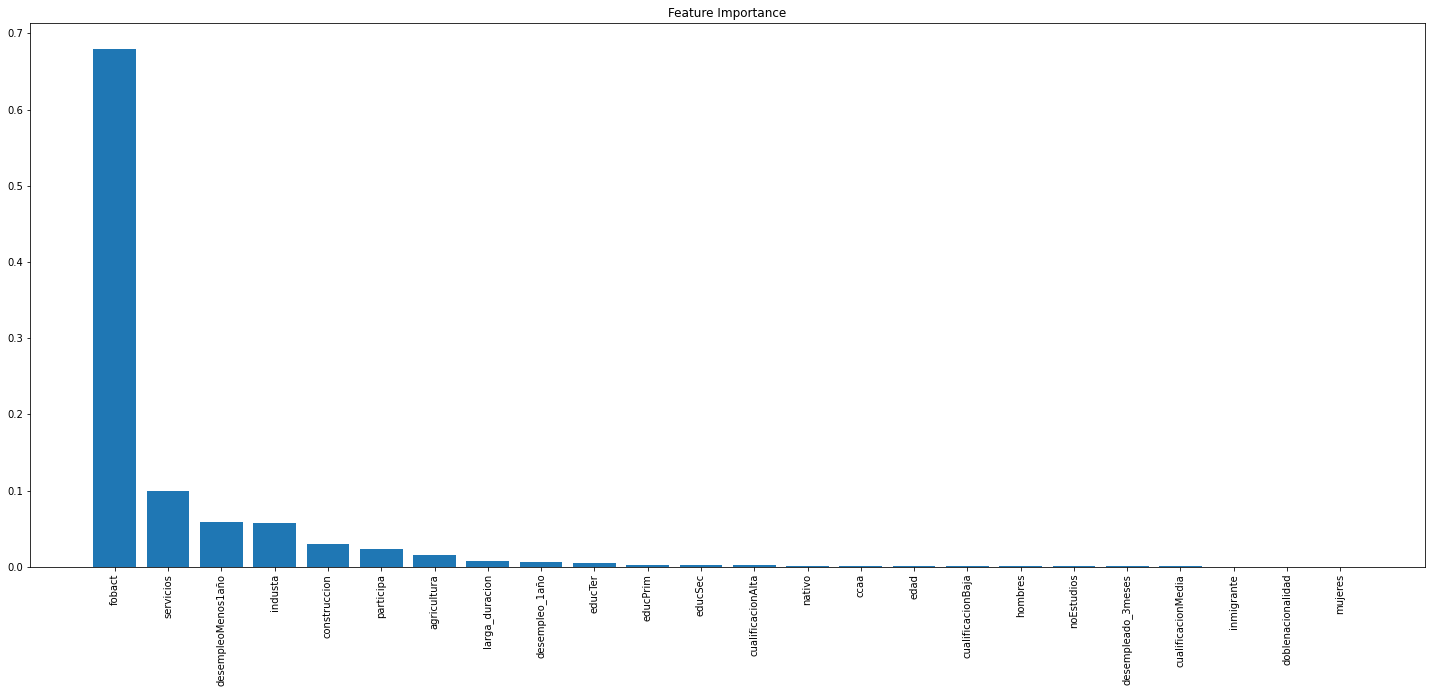

In [69]:
importances = model_xg_parado.feature_importances_

indices = np.argsort(importances)[::-1]

names = [train_X_onehot.columns[i] for i in indices]

plt.figure()
plt.rcParams['figure.figsize'] = [25, 10]
plt.title("Feature Importance")
plt.bar(range(train_X_onehot.shape[1]), importances[indices])
plt.xticks(range(train_X_onehot.shape[1]), names, rotation=90)
plt.show()

In [70]:
train['clasificacion_model_rf_desempleado'] = model_xg_parado.predict(train_X_onehot) 

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [72]:
pd.crosstab(train.clasificacion_model_rf_desempleado,train.parado).style.background_gradient(cmap='summer_r')

parado,0,1
clasificacion_model_rf_desempleado,,
0,945237,6744
1,13293,108821


In [73]:
metrics.precision_score(train.parado, train.clasificacion_model_rf_desempleado)

0.8911427027204089

In [74]:
metrics.recall_score(train.parado, train.clasificacion_model_rf_desempleado)

0.941643231082075

In [75]:
fpr, tpr, thresholds = metrics.roc_curve(train.parado, train.clasificacion_model_rf_desempleado, pos_label=1)

metrics.auc(fpr, tpr)

0.963887560268902

### Modelo XGboost final: desempleado 2

In [81]:
train_base_desempleado2 = ['hombres', 'mujeres', 'edad', 'noEstudios', 'educPrim', 'educSec', 
              'educTer', 'cualificacionAlta', 'cualificacionMedia', 'cualificacionBaja','inmigrante', 
              'nativo', 'doblenacionalidad', 'ccaa']

In [83]:
train,test=train_test_split(df_stata,test_size=0.3,random_state=37)

train_X=train[train_base_desempleado2]
train_Y=train['parado']

test_X=test[train_base_desempleado2]
test_Y=test['parado']

X=df_stata[train_base_desempleado2]
Y=df_stata['parado']

In [85]:
train_X_onehot = pd.get_dummies(train_X)
test_X_onehot = pd.get_dummies(test_X)

In [86]:
model_xg_parado2=xg.XGBClassifier(n_estimators=350,learning_rate=0.01)
model_xg_parado2.fit(train_X_onehot,train_Y)

[18:16:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=8, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

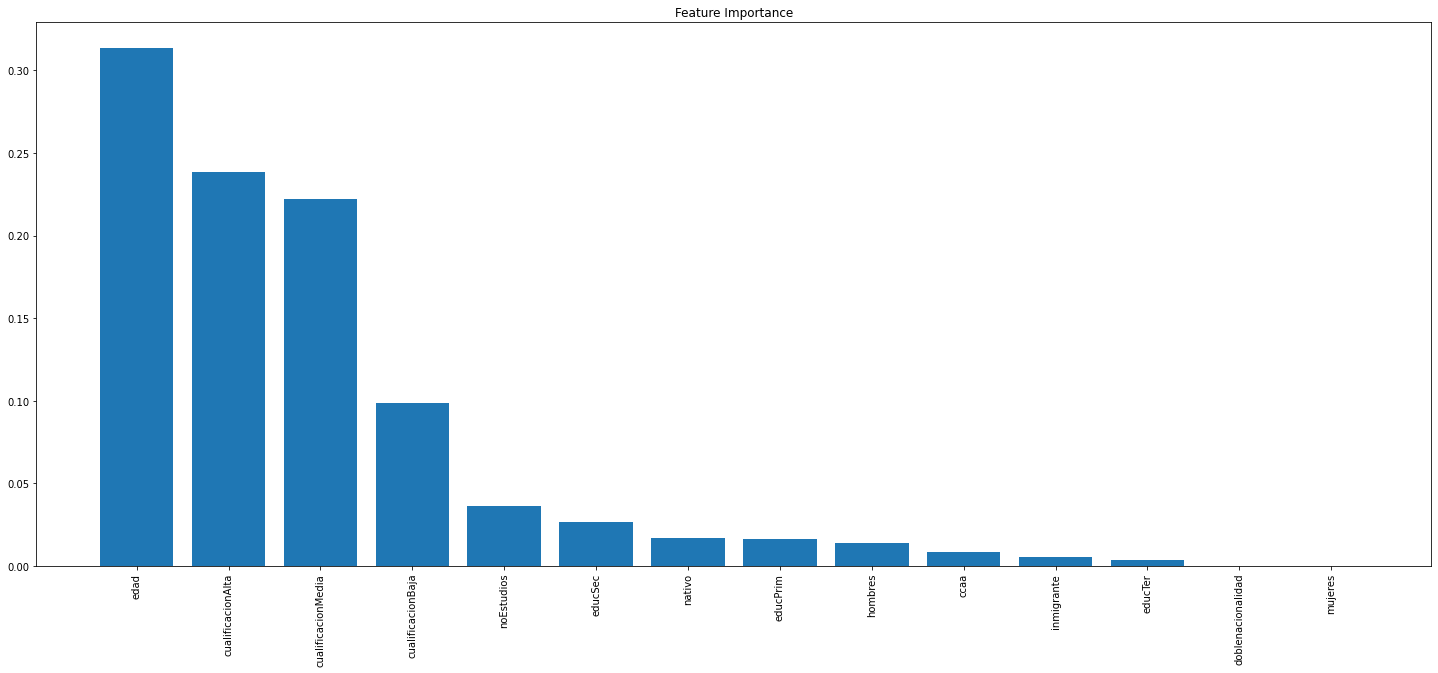

In [87]:
importances = model_xg_parado2.feature_importances_

indices = np.argsort(importances)[::-1]

names = [train_X_onehot.columns[i] for i in indices]

plt.figure()
plt.rcParams['figure.figsize'] = [25, 10]
plt.title("Feature Importance")
plt.bar(range(train_X_onehot.shape[1]), importances[indices])
plt.xticks(range(train_X_onehot.shape[1]), names, rotation=90)
plt.show()

In [89]:
train['clasificacion_model_rf_desempleado2'] = model_xg_parado2.predict(train_X_onehot) 

C:\Users\34654\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [91]:
pd.crosstab(train.clasificacion_model_rf_desempleado2,train.parado).style.background_gradient(cmap='summer_r')

parado,0,1
clasificacion_model_rf_desempleado2,,
0,954592,109069
1,3938,6496


In [92]:
metrics.precision_score(train.parado, train.clasificacion_model_rf_desempleado2)

0.622580026835346

In [93]:
metrics.recall_score(train.parado, train.clasificacion_model_rf_desempleado2)

0.056210790464240906

In [95]:
fpr, tpr, thresholds = metrics.roc_curve(train.parado, train.clasificacion_model_rf_desempleado2, pos_label=1)

metrics.auc(fpr, tpr)

0.5260512080913945

#### Shap

In [1]:
## pip install shap
## import shap

In [96]:
explainer = shap.TreeExplainer(model_xg)

In [100]:
shap_values = explainer.shap_values(test_X_onehot)

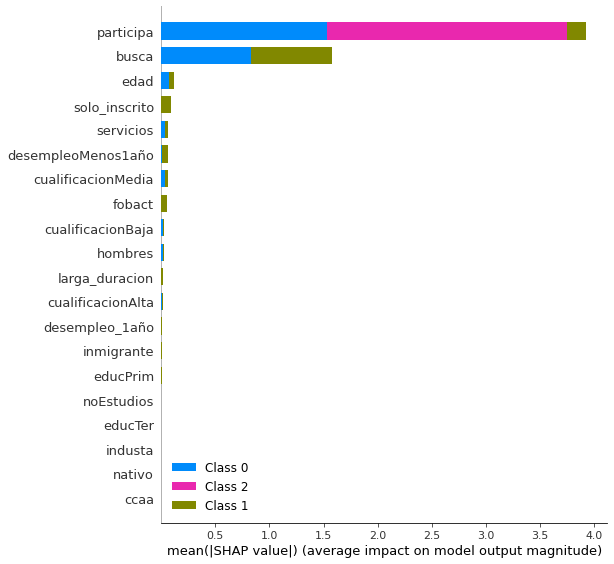

In [101]:
shap.summary_plot(shap_values, test_X_onehot)

In [104]:
shap.initjs()

In [105]:
shap.force_plot(explainer.expected_value, shap_values[0,:], test_X_onehot.iloc[0,:])

TypeError: list indices must be integers or slices, not tuple

In [103]:
k = 231
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[k,:], test_X_onehot.iloc[k,:])

TypeError: list indices must be integers or slices, not tuple